In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import warnings

warnings.simplefilter('ignore')
%matplotlib inline

In [2]:
rpe_df = pd.read_csv("../data/rpe.csv")
games_df = pd.read_csv("../data/games.csv")
gps_df = pd.read_csv("../data/gps.csv")
well_df = pd.read_csv("../data/wellness.csv")

In [3]:
'''
    Insights: 
                1. The data for DailyLoad, AcuteLoad, ChronicLoad and AcuteChronicRatio are missing for players when the session
                    type is Combat
    
    Cleaning:
                1. Have dropped N/A values in place
                2. Changed Best out of Myself ordinal to Numerical values (1,0.5,0)
                3. Also added Psuedo running averages for 7 day load and 30 day load
    
    # groupby player id, Normalize from (0,1) over axis 0 for each variable
    # Can also use session type, and training as groupby variables
    
    Convert Best outof myself from ordinal to numerical
    fill_na with a negative value. Can also do a missing value plot to see under which values are the data missing 
    (i.e. MCAR/ MAR etc.). # R
    
    Date, Player id with well 
    
'''

rpe_df['Date'] = pd.to_datetime(rpe_df.Date)


time_7 = rpe_df.Date - timedelta(days=7)
time_30 = rpe_df.Date - timedelta(days=30)

rpe_df['Date_7'] = time_7
rpe_df['Date_30'] = time_30


def pseudo7S(x):
    '''
        Calculating the 7 Day running average with the session variable as a groupby object
    '''
    PlayerID = x['PlayerID']
    SessionType = x['SessionType']
    Training = x['Training']
    Date = x['Date']
    Date_7 = x['Date_7']
    
    new_val = rpe_df[(rpe_df["PlayerID"]==PlayerID) & 
                     (rpe_df["SessionType"]==SessionType) &
                     (rpe_df["Training"]==Training) &
                     (rpe_df['Date']<=Date) &
                     (rpe_df['Date']>=Date_7)
          ]['SessionLoad'].dropna().mean()
    
    return(new_val)
    

def pseudo30S(x):
    '''
        Calculating the 30 Day moving average with the session variable as a groupby object
    '''
    PlayerID = x['PlayerID']
    SessionType = x['SessionType']
    Training = x['Training']
    Date = x['Date']
    Date_30 = x['Date_30']
    
    new_val = rpe_df[(rpe_df["PlayerID"]==PlayerID) & 
                     (rpe_df["SessionType"]==SessionType) &
                     (rpe_df["Training"]==Training) &
                     (rpe_df['Date']<=Date) &
                     (rpe_df['Date']>=Date_30)
          ]['SessionLoad'].dropna().mean()
    
    return(new_val)
    

    
def pseudo7A(x):
    '''
        Calculating the 7 day moving average with all the details
    '''
    PlayerID = x['PlayerID']
    SessionType = x['SessionType']
    Training = x['Training']
    Date = x['Date']
    Date_7 = x['Date_7']
    
    new_val = rpe_df[(rpe_df["PlayerID"]==PlayerID) & 
                     (rpe_df['Date']<=Date) &
                     (rpe_df['Date']>=Date_7)
          ]['SessionLoad'].dropna().mean()
    
    return(new_val)
    

def pseudo30A(x):
    '''
        Calculating the 30 day moving average of session variable with all the details
    '''
    PlayerID = x['PlayerID']
    SessionType = x['SessionType']
    Training = x['Training']
    Date = x['Date']
    Date_30 = x['Date_30']
    
    new_val = rpe_df[(rpe_df["PlayerID"]==PlayerID) & 
                         (rpe_df['Date']<=Date) &
                         (rpe_df['Date']>=Date_30)
          ]['SessionLoad'].dropna().mean()
    
    return(new_val)
   
def Dpseudo7S(x):
    '''
        Calculating the 7 Day running average with the session variable as a groupby object
    '''
    PlayerID = x['PlayerID']
    SessionType = x['SessionType']
    Training = x['Training']
    Date = x['Date']
    Date_7 = x['Date_7']
    
    new_val = rpe_df[(rpe_df["PlayerID"]==PlayerID) & 
                     (rpe_df["SessionType"]==SessionType) &
                     (rpe_df["Training"]==Training) &
                     (rpe_df['Date']<=Date) &
                     (rpe_df['Date']>=Date_7)
          ]['DailyLoad'].dropna().mean()
    
    return(new_val)
    

def Dpseudo30S(x):
    '''
        Calculating the 30 Day moving average with the session variable as a groupby object
    '''
    PlayerID = x['PlayerID']
    SessionType = x['SessionType']
    Training = x['Training']
    Date = x['Date']
    Date_30 = x['Date_30']
    
    new_val = rpe_df[(rpe_df["PlayerID"]==PlayerID) & 
                     (rpe_df["SessionType"]==SessionType) &
                     (rpe_df["Training"]==Training) &
                     (rpe_df['Date']<=Date) &
                     (rpe_df['Date']>=Date_30)
          ]['DailyLoad'].dropna().mean()
    
    return(new_val)
    

    
def Dpseudo7A(x):
    '''
        Calculating the 7 day moving average with all the details
    '''
    PlayerID = x['PlayerID']
    SessionType = x['SessionType']
    Training = x['Training']
    Date = x['Date']
    Date_7 = x['Date_7']
    
    new_val = rpe_df[(rpe_df["PlayerID"]==PlayerID) & 
                     (rpe_df['Date']<=Date) &
                     (rpe_df['Date']>=Date_7)
          ]['DailyLoad'].dropna().mean()
    
    return(new_val)
    

def Dpseudo30A(x):
    '''
        Calculating the 30 day moving average of session variable with all the details
    '''
    PlayerID = x['PlayerID']
    SessionType = x['SessionType']
    Training = x['Training']
    Date = x['Date']
    Date_30 = x['Date_30']
    
    new_val = rpe_df[(rpe_df["PlayerID"]==PlayerID) & 
                         (rpe_df['Date']<=Date) &
                         (rpe_df['Date']>=Date_30)
          ]['DailyLoad'].dropna().mean()
    
    return(new_val)

def BOM_num(x):
    """
        Converts the bestofmatch ordinal variable to numerical value
    """
    if(x=='Absolutely'):
        return(1)
    elif(x=='Somewhat'):
        return(0.5)
    elif(x=='Not at all'):
        return(0)
    else:
        return(-1)

    

rpe_df["Sesspseudo7Sess"] = rpe_df.apply(pseudo7S, axis=1)
rpe_df["Sesspseudo30Sess"] = rpe_df.apply(pseudo30S, axis=1)
rpe_df["Sesspseudo7All"] = rpe_df.apply(pseudo7A, axis=1)
rpe_df["Sesspseudo30All"] = rpe_df.apply(pseudo30A, axis=1)


rpe_df["Dailypseudo7Sess"] = rpe_df.apply(Dpseudo7S, axis=1)
rpe_df["Dailypseudo30Sess"] = rpe_df.apply(Dpseudo30S, axis=1)
rpe_df["Dailypseudo7All"] = rpe_df.apply(Dpseudo7A, axis=1)
rpe_df["Dailypseudo30All"] = rpe_df.apply(Dpseudo30A, axis=1)

rpe_df.reset_index(drop=True,inplace=True)

rpe_df.head()

,Date,PlayerID,Training,SessionType,Duration,RPE,SessionLoad,DailyLoad,AcuteLoad,ChronicLoad,...,Date_7,Date_30,Sesspseudo7Sess,Sesspseudo30Sess,Sesspseudo7All,Sesspseudo30All,Dailypseudo7Sess,Dailypseudo30Sess,Dailypseudo7All,Dailypseudo30All
0,2018-07-21,13,Yes,Mobility/Recovery,5.0,0.0,0.0,446.0,323.1,303.25,...,2018-07-14,2018-06-21,0.0,0.0,161.571429,177.696429,223.0,285.142857,377.0,497.550000
1,2018-07-21,13,Yes,Game,29.0,7.0,203.0,NaN,NaN,NaN,...,2018-07-14,2018-06-21,188.0,188.0,161.571429,177.696429,306.0,306.000000,377.0,497.550000
2,2018-07-21,13,Yes,Game,27.0,9.0,243.0,NaN,NaN,NaN,...,2018-07-14,2018-06-21,188.0,188.0,161.571429,177.696429,306.0,306.000000,377.0,497.550000
3,2018-07-20,11,Yes,Game,36.0,6.0,216.0,534.0,256.3,344.18,...,2018-07-13,2018-06-20,252.0,184.0,299.000000,254.085106,534.0,534.000000,448.5,702.470588
4,2018-07-20,11,Yes,Game,36.0,8.0,288.0,NaN,NaN,NaN,...,2018-07-13,2018-06-20,252.0,184.0,299.000000,254.085106,534.0,534.000000,448.5,702.470588


In [4]:
well_df.head()

,Date,PlayerID,Fatigue,Soreness,Desire,Irritability,BedTime,WakeTime,SleepHours,SleepQuality,MonitoringScore,Pain,Illness,Menstruation,Nutrition,NutritionAdjustment,USGMeasurement,USG,TrainingReadiness
0,2018-07-21,1,3,3,2,3,23:00:00,07:00:00,8.00,2,13,No,No,Yes,Excellent,Yes,No,NaN,0%
1,2018-07-21,2,4,3,4,4,23:00:00,07:00:00,8.00,4,19,Yes,No,Yes,NaN,NaN,Yes,1.010,0%
2,2018-07-21,3,3,3,5,4,22:30:00,06:30:00,8.00,4,19,No,No,No,NaN,NaN,Yes,1.016,100%
3,2018-07-21,4,2,3,5,4,00:30:00,07:00:00,6.50,1,15,No,No,Yes,Excellent,Yes,Yes,1.025,95%
4,2018-07-21,5,5,3,4,4,23:45:00,07:00:00,7.25,4,20,No,No,No,Okay,Yes,Yes,1.022,100%


In [5]:
well_df['Date'] = pd.to_datetime(well_df['Date'])
new_combined_df = pd.merge(rpe_df,well_df, on=['Date','PlayerID'],how='outer')

new_combined_df.head()


,Date,PlayerID,Training,SessionType,Duration,RPE,SessionLoad,DailyLoad,AcuteLoad,ChronicLoad,...,SleepQuality,MonitoringScore,Pain,Illness,Menstruation,Nutrition,NutritionAdjustment,USGMeasurement,USG,TrainingReadiness
0,2018-07-21,13,Yes,Mobility/Recovery,5.0,0.0,0.0,446.0,323.1,303.25,...,4.0,20.0,No,No,No,Excellent,Yes,Yes,1.025,100%
1,2018-07-21,13,Yes,Game,29.0,7.0,203.0,NaN,NaN,NaN,...,4.0,20.0,No,No,No,Excellent,Yes,Yes,1.025,100%
2,2018-07-21,13,Yes,Game,27.0,9.0,243.0,NaN,NaN,NaN,...,4.0,20.0,No,No,No,Excellent,Yes,Yes,1.025,100%
3,2018-07-20,11,Yes,Game,36.0,6.0,216.0,534.0,256.3,344.18,...,4.0,22.0,No,Slightly Off,No,Excellent,Yes,Yes,1.016,100%
4,2018-07-20,11,Yes,Game,36.0,8.0,288.0,NaN,NaN,NaN,...,4.0,22.0,No,Slightly Off,No,Excellent,Yes,Yes,1.016,100%


In [6]:
# Subsetting the dataframes

new_df_org = new_combined_df[['Date','PlayerID','Fatigue','AcuteLoad','ChronicLoad']]
new_df_org.dropna(inplace=True)
new_df_org.sort_values(by='Date',inplace=True)
#new_df_org.head()
#print(new_df_org.shape)
X_train_org = new_df_org.drop(['Date','Fatigue'],axis=1)[-3000:]
X_test_org = new_df_org.drop(['Date','Fatigue'],axis=1)[:1000]


y_train_org = new_df_org['Fatigue'][-3000:]
y_test_org = new_df_org['Fatigue'][:1000]


new_df_syn = new_combined_df[['Date',
                              'PlayerID',
                              'Fatigue',
                              'Sesspseudo7Sess',
                              'Sesspseudo30Sess',
                              'Sesspseudo7All',
                              'Sesspseudo30All',
                              'Dailypseudo7Sess',
                              'Dailypseudo30Sess',
                              'Dailypseudo7All',
                              'Dailypseudo30All']]

new_df_syn.dropna(inplace=True)
new_df_syn.sort_values(by="Date",inplace=True)
#new_df_syn.head()
#print(new_df_syn.shape)

X_train_syn = new_df_syn.drop(['Date','Fatigue'],axis=1)[-3000:]
X_test_syn = new_df_syn.drop(['Date','Fatigue'],axis=1)[:1000]


y_train_syn = new_df_syn['Fatigue'][-3000:]
y_test_syn = new_df_syn['Fatigue'][:1000]

#new_combined_df['Fatigue']

In [7]:
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
#EL1 = ElasticNet()

#EL1.fit(X_train_org,y_train_org)
#EL1.score(X_test_org,y_test_org)

gbc = GradientBoostingClassifier()
gbc.fit(X_train_org,y_train_org)
#gbc.score(X_test_org,y_test_org)
y_org = gbc.predict(X_test_org)
print(classification_report(y_test_org,y_org))

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        22
         2.0       0.17      0.27      0.21        64
         3.0       0.39      0.47      0.43       308
         4.0       0.53      0.57      0.55       445
         5.0       0.21      0.08      0.12        73
         6.0       1.00      0.01      0.02        87
         7.0       0.00      0.00      0.00         1

   micro avg       0.42      0.42      0.42      1000
   macro avg       0.33      0.20      0.19      1000
weighted avg       0.47      0.42      0.40      1000



In [8]:
gbc2 = GradientBoostingClassifier()
gbc2.fit(X_train_syn,y_train_syn)
#gbc2.score(X_test_syn,y_test_syn)


y_syn = gbc2.predict(X_test_syn)
print(classification_report(y_test_syn,y_syn))

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        10
         2.0       0.15      0.13      0.14        70
         3.0       0.34      0.57      0.43       303
         4.0       0.48      0.43      0.45       463
         5.0       0.30      0.04      0.07        81
         6.0       0.00      0.00      0.00        72
         7.0       0.00      0.00      0.00         1

   micro avg       0.38      0.38      0.38      1000
   macro avg       0.18      0.17      0.15      1000
weighted avg       0.36      0.38      0.35      1000



In [9]:
# Dropping missing values
#rpe_gb = rpe_df.dropna().drop(['Date','BestOutOfMyself'],axis=1).groupby(['PlayerID','Training','SessionType']).transform(lambda x: (x- x.min())/(x.max() - x.min()))

# Filling missing values with -1
rpe_gb = rpe_df.fillna(-1).drop(['Date','BestOutOfMyself'],axis=1).groupby(['PlayerID','Training','SessionType']).transform(lambda x: (x- x.min())/(x.max() - x.min()))

rpe_gb['Date'] = rpe_df['Date']
rpe_gb['PlayerID'] = rpe_df['PlayerID']
rpe_gb['Training'] = rpe_df['Training']
rpe_gb['SessionType'] = rpe_df['SessionType']

# Converting BestOutofMyself ordinal to numerical
rpe_gb['BestOutOfMyself'] = rpe_df['BestOutOfMyself'].apply(lambda x: BOM_num(x))

# TAKE CARE OF THIS
#rpe_gb = rpe_gb.fillna(-1)

# Resetting the index, changed due to dropping the NA values
rpe_gb.reset_index(drop=True, inplace=True)
rpe_gb.head()


,Duration,RPE,SessionLoad,DailyLoad,AcuteLoad,ChronicLoad,AcuteChronicRatio,ObjectiveRating,FocusRating,Date_7,...,Sesspseudo30All,Dailypseudo7Sess,Dailypseudo30Sess,Dailypseudo7All,Dailypseudo30All,Date,PlayerID,Training,SessionType,BestOutOfMyself
0,0.000000,0.000,0.000000,0.526502,0.419601,0.436583,0.414000,0.000000,0.0,1.0,...,0.287531,0.432711,0.950290,0.287660,0.360249,2018-07-21,13,Yes,Mobility/Recovery,0.0
1,0.833333,0.750,0.639860,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,...,0.407680,0.599609,0.646316,0.408286,0.508037,2018-07-21,13,Yes,Game,0.0
2,0.766667,1.000,0.779720,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,...,0.407680,0.599609,0.646316,0.408286,0.508037,2018-07-21,13,Yes,Game,0.0
3,0.850000,0.625,0.537688,0.504717,0.499515,0.640872,0.813084,0.666667,1.0,1.0,...,0.467335,0.544252,0.553257,0.384349,0.603187,2018-07-20,11,Yes,Game,1.0
4,0.850000,0.875,0.718593,0.000000,0.000000,0.000000,0.000000,0.666667,1.0,1.0,...,0.467335,0.544252,0.553257,0.384349,0.603187,2018-07-20,11,Yes,Game,1.0


In [10]:
rpe_gb.columns

Index(['Duration', 'RPE', 'SessionLoad', 'DailyLoad', 'AcuteLoad',
       'ChronicLoad', 'AcuteChronicRatio', 'ObjectiveRating', 'FocusRating',
       'Date_7', 'Date_30', 'Sesspseudo7Sess', 'Sesspseudo30Sess',
       'Sesspseudo7All', 'Sesspseudo30All', 'Dailypseudo7Sess',
       'Dailypseudo30Sess', 'Dailypseudo7All', 'Dailypseudo30All', 'Date',
       'PlayerID', 'Training', 'SessionType', 'BestOutOfMyself'],
      dtype='object')

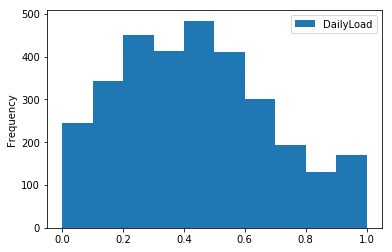

In [11]:
rpe_gb[rpe_gb['DailyLoad'] !=0][["DailyLoad"]].plot.hist()

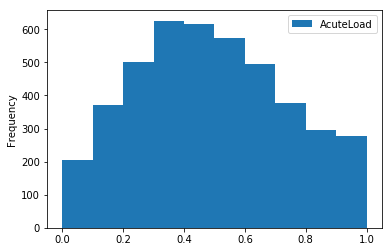

In [12]:
rpe_gb[rpe_gb['AcuteLoad'] !=0][["AcuteLoad"]].plot.hist()

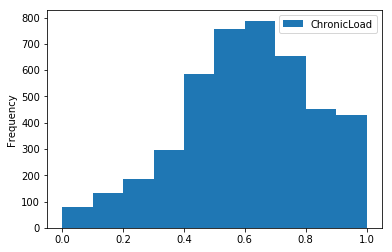

In [13]:
rpe_gb[rpe_gb['ChronicLoad'] !=0][["ChronicLoad"]].plot.hist()

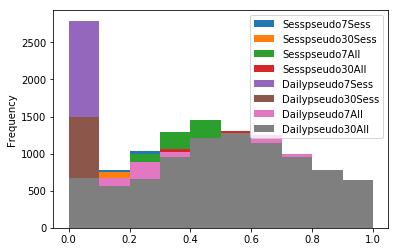

In [14]:
rpe_gb[['Sesspseudo7Sess', 'Sesspseudo30Sess',
       'Sesspseudo7All', 'Sesspseudo30All', 'Dailypseudo7Sess',
       'Dailypseudo30Sess', 'Dailypseudo7All', 'Dailypseudo30All']].plot.hist()

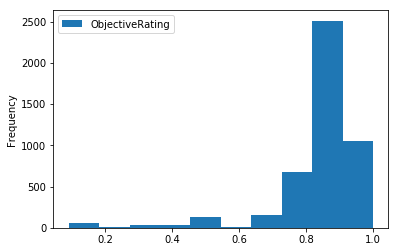

In [15]:
rpe_gb[rpe_gb['ObjectiveRating'] !=0][['ObjectiveRating']].plot.hist()

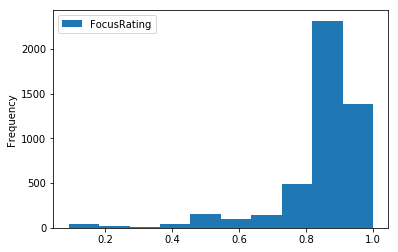

In [16]:
rpe_gb[rpe_gb['FocusRating'] !=0][['FocusRating']].plot.hist()

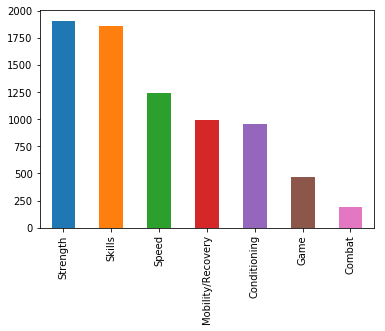

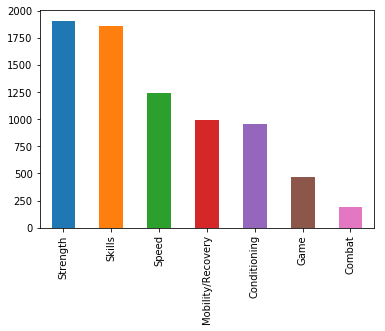

In [17]:
rpe_gb['SessionType'].value_counts().plot.bar()
plt.show()

rpe_df['SessionType'].value_counts().plot.bar()
plt.show()

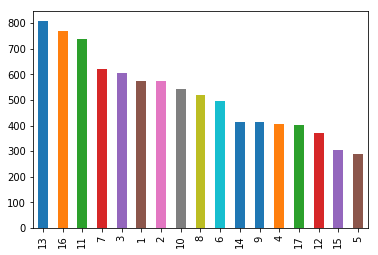

In [18]:
rpe_gb['PlayerID'].value_counts().plot.bar()

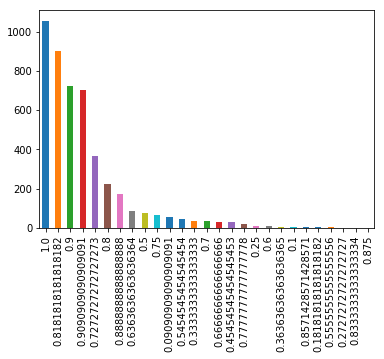

In [19]:
rpe_gb[rpe_gb['ObjectiveRating'] !=0]['ObjectiveRating'].value_counts().plot.bar()

-1.0    5841
 1.0    2438
 0.0     368
 0.5     213
Name: BestOutOfMyself, dtype: int64


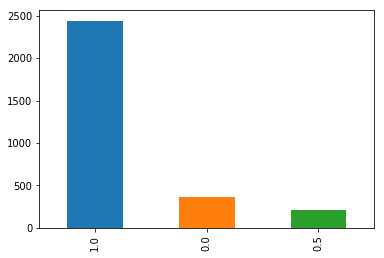

In [20]:
print(rpe_gb['BestOutOfMyself'].value_counts())
rpe_gb[rpe_gb['BestOutOfMyself'] !=-1]['BestOutOfMyself'].value_counts().plot.bar()

Absolutely    2438
Not at all     368
Somewhat       213
Name: BestOutOfMyself, dtype: int64
5841


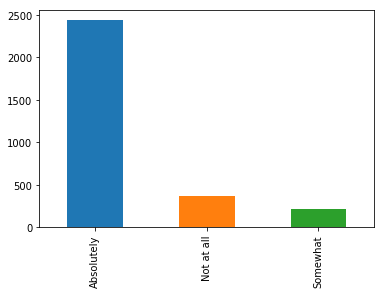

In [21]:
print(rpe_df['BestOutOfMyself'].value_counts())
print(rpe_df['BestOutOfMyself'].isna().sum())
rpe_df['BestOutOfMyself'].value_counts().plot.bar()

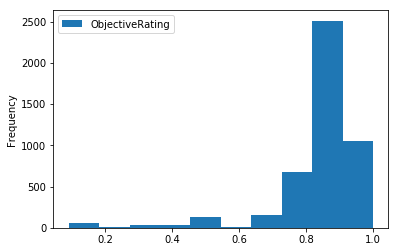

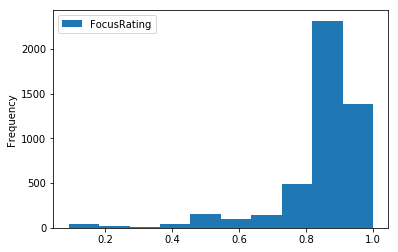

In [22]:
rpe_gb[rpe_gb['ObjectiveRating'] !=0][['ObjectiveRating']].plot.hist()
rpe_gb[rpe_gb['FocusRating'] !=0][['FocusRating']].plot.hist()